In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
import cv2
import tensorflow as tf 
import numpy as np
import matplotlib

from numpy import expand_dims

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array , array_to_img
from matplotlib import pyplot

datagen = ImageDataGenerator(rotation_range=40,
        width_shift_range=0.2,
        brightness_range=[0.2,1.0],
        height_shift_range=0.2,
        shear_range=0.2,
        vertical_flip=True,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


data_dir = "/content/drive/My Drive/Project_GAN/original_images"
path = os.path.join(data_dir)
count = 0
for imagee in os.listdir(path):
  img_array = cv2.imread(os.path.join(path,imagee))
  img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB )
  samples = expand_dims(img_array,0)
    
  for batch in datagen.flow(samples, batch_size=1,save_to_dir="/content/drive/My Drive/Project_GAN/model_input_images", save_format='png'):
    count += 1
    if count > 25:
            
      break

In [ ]:

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Conv2DTranspose, Flatten, BatchNormalization , ReLU, LeakyReLU, Dropout,Reshape
from keras.optimizers import Adam


import matplotlib.pyplot as plt
from tqdm import tqdm


In [ ]:
def discriminator():
	model = Sequential()
	model.add(Conv2D(8, (3,3) , strides= (2,2), padding= 'same',input_shape = (256,256,3)))
	model.add(LeakyReLU(0.2))
	model.add(Dropout(0.3))

#128*128*8
	
	model.add(Conv2D(16, (3,3) , strides= (2,2), padding= 'same'))
	model.add(BatchNormalization( momentum= 0.7))
	model.add(LeakyReLU(0.2))
	model.add(Dropout(0.3))
#64*64*16

	model.add(Conv2D(32, (3,3) , strides= (2,2), padding= 'same'))
	model.add(BatchNormalization(momentum= 0.7))
	model.add(LeakyReLU(0.2))
	model.add(Dropout(0.3))
#32*32*32

	model.add(Conv2D(64, (3,3) , strides= (2,2), padding= 'same'))
	model.add(BatchNormalization(momentum= 0.7))
	model.add(LeakyReLU(0.2))
	model.add(Dropout(0.3))
#16*16*64

	model.add(Conv2D(128, (3,3) , strides= (2,2), padding= 'same'))
	model.add(BatchNormalization(momentum= 0.7))
	model.add(LeakyReLU(0.2))
	model.add(Dropout(0.25))
#8*8*128
	model.add(Conv2D(256, (3,3) , strides= (2,2), padding= 'same'))
	model.add(BatchNormalization(momentum= 0.7))
	model.add(LeakyReLU(0.2))
	model.add(Dropout(0.25))
#4*4*256
	model.add(Flatten())
	model.add(Dense(128))
	model.add(LeakyReLU(0.2))


	model.add(Dense(1,activation ='sigmoid'))
	optimus = Adam(learning_rate= 0.0002 ,beta_1=0.5)
	model.compile(optimizer= optimus, loss = 'binary_crossentropy',metrics=['accuracy'])

	return model



In [ ]:
def generator(latent_dim):
	model = Sequential()
	model.add(Dense((4096),input_dim = latent_dim))
	model.add(Reshape((1,1,4096)))

	model.add(Conv2DTranspose(512, (4,4) , strides=(2,2), padding='same'))
	model.add(ReLU())
#2*2*512
	model.add(Conv2DTranspose(256,(4,4),strides= 2, padding = 'same'))
	model.add(BatchNormalization(momentum=0.7))
	model.add(ReLU())
	model.add(Dropout(0.25))
#4*4*256
	model.add(Conv2DTranspose(128,(4,4),strides= 2, padding = 'same'))
	model.add(BatchNormalization(momentum=0.7))
	model.add(ReLU())
	model.add(Dropout(0.3))
#8*8*128
	model.add(Conv2DTranspose(128,(4,4),strides= 2, padding = 'same'))
	model.add(BatchNormalization(momentum=0.7))
	model.add(ReLU())
	model.add(Dropout(0.3))
#16*16*128
	model.add(Conv2DTranspose(128,(4,4),strides= 2, padding = 'same'))
	model.add(BatchNormalization(momentum=0.7))
	model.add(ReLU())
	model.add(Dropout(0.3))
#32*32*128
	model.add(Conv2DTranspose(128,(4,4),strides= 2, padding = 'same'))
	model.add(BatchNormalization(momentum=0.7))
	model.add(ReLU())
	model.add(Dropout(0.25))
#64*64*128	
	model.add(Conv2DTranspose(128,(4,4),strides= 2, padding = 'same'))
	model.add(BatchNormalization(momentum=0.7))
	model.add(ReLU())
	model.add(Dropout(0.3))
#128*128*128

	model.add(Conv2DTranspose(128,(4,4),strides= 2, padding = 'same'))
	model.add(BatchNormalization(momentum=0.7))
	model.add(ReLU())
	model.add(Dropout(0.25))

#256*256*4
	model.add(Conv2D(3,(3,3),activation= 'tanh',padding = 'same'))
	optimus = Adam(learning_rate=0.0002,beta_1=0.5)

	model.compile(optimizer=optimus , loss = 'binary_crossentropy')

	return model



In [ ]:
def gan(g_model,d_model):

	d_model.trainable = False
	model =Sequential()
	model.add(g_model)
	model.add(d_model)
	optimus = Adam(learning_rate=0.0002,beta_1=0.5)
	model.compile(optimizer=optimus,loss='binary_crossentropy')
	return model


In [ ]:
def load_real_data(xsam):
    
    x= np.array(xsam).reshape(-1,256,256,3)
    x = (x-127.5)/127.5
    print(x.shape)
    return x

In [ ]:
def generate_real_samples(dataset , n_samples):

	for i in range (n_samples):
		index = np.random.randint(0 , dataset.shape[0] , n_samples)

		image = dataset[index]
		y = np.ones((n_samples,1))

		return image,y

In [ ]:

def generate_latent_sample(laten_dim,n_samples):
	
	x = np.random.randn(laten_dim*n_samples)
	x = x.reshape(n_samples,laten_dim)

	return x

In [ ]:
def generate_fake_samples(g_model, latent_dim,n_samples):
	
	x = generate_latent_sample(latent_dim,n_samples)
	x = g_model.predict(x)
	y = np.zeros((n_samples,1))

	return x,y

In [ ]:
def save_plot(examples ,epoch , n = 3):
	images_dir = '/content/drive/My Drive/Project_GAN/output_images/'
	examples = (examples+1) / 2.0

	for i in range(n*n):
		pyplot.subplot(3,3,1+i)
		pyplot.axis('off')
		pyplot.imshow(examples[i])
	filename = "generated_plot_e%0.3d.png" % (epoch+1)
	pyplot.savefig(images_dir+filename)
	pyplot.close()


In [ ]:
def summarize_performance(epoch,g_model,d_model,dataset,latent_dim,n_samples = 130):

	x_real ,y_real = generate_real_samples(dataset,n_samples)
	_,acc_real = d_model.evaluate(x_real,y_real)

	x_fake,y_fake = generate_fake_samples(g_model,latent_dim,n_samples)
	_,acc_fake = d_model.evaluate(x_fake,y_fake)

	print(('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100)))
	save_plot(x_fake,epoch)
	g_model.save('/content/drive/My Drive/Project_GAN/saved_models/generator_model.h5')
	d_model.save('/content/drive/My Drive/Project_GAN/saved_models/discriminator_model.h5')



In [ ]:
def train(g_model,d_model,gan_model, dataset ,latent_dim, n_epoch = 500, n_batch = 8):
	batch_per_epoch = int(dataset.shape[0]/n_batch)
	batch = int(n_batch/2)

	for i in range(n_epoch):
		for j in range (batch_per_epoch):

			x_real,y_real = generate_real_samples(dataset,batch)

			d_model_loss1,_ = d_model.train_on_batch(x_real,y_real)

			x_fake ,y_fake = generate_fake_samples(g_model,latent_dim,batch)

			d_model_loss2,_ =d_model.train_on_batch(x_fake,y_fake)

			x_gan = generate_latent_sample(latent_dim, n_batch)
			y_gan = np.ones((n_batch,1))

			g_model_loss = gan_model.train_on_batch(x_gan,y_gan)

			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f'% 
                  (i+1, j+1, batch_per_epoch, d_model_loss1, d_model_loss2, g_model_loss))
		if (i+1) % 10 ==0 :
			summarize_performance(i,g_model,d_model,dataset,latent_dim)


In [ ]:
xsam = []
CATEGORIES = [""]
training_data = []
IMG_SIZE = (256)

data_dir = "/content/drive/My Drive/Project_GAN/model_input_images"

In [ ]:
# for category in CATEGORIES:

path = os.path.join(data_dir) 

for img in tqdm(os.listdir(path)):
  img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_UNCHANGED)  # convert to array
  img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB )
  new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))  # resize to normalize data size
  training_data.append([new_array])  # add this to our training_data


100%|██████████| 130/130 [00:01<00:00, 66.31it/s]


In [ ]:
print(len(training_data))

130


In [ ]:
np.array(training_data).shape

(130, 1, 256, 256, 3)

In [ ]:
for features in training_data:
  
  xsam.append(features)
#  #   return xsam
print(np.array(xsam).shape)
print(np.array(training_data).shape)

(130, 1, 256, 256, 3)
(130, 1, 256, 256, 3)


In [ ]:

latent_dim = 256
d_model = discriminator()
g_model = generator(latent_dim)
gan_model = gan(g_model,d_model)
d_model.summary()
g_model.summary()
print(np.array(training_data).shape)

dataset = load_real_data(xsam)
train(g_model,d_model,gan_model,dataset,latent_dim)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 8)       224       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 128, 128, 8)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 16)        1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 16)        64        
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 64, 64, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 64, 16)       

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Streaming output truncated to the last 5000 lines.
>194, 7/16, d1=0.482, d2=0.332 g=2.382
>194, 8/16, d1=0.108, d2=0.141 g=2.824
>194, 9/16, d1=1.092, d2=0.157 g=4.173
>194, 10/16, d1=0.048, d2=0.137 g=2.624
>194, 11/16, d1=0.158, d2=0.039 g=2.451
>194, 12/16, d1=0.142, d2=1.233 g=4.175
>194, 13/16, d1=0.169, d2=0.277 g=2.827
>194, 14/16, d1=0.317, d2=0.124 g=3.947
>194, 15/16, d1=0.298, d2=0.156 g=2.389
>194, 16/16, d1=0.702, d2=0.333 g=2.298
>195, 1/16, d1=0.131, d2=0.857 g=4.303
>195, 2/16, d1=0.156, d2=0.146 g=3.884
>195, 3/16, d1=0.251, d2=0.380 g=3.696
>195, 4/16, d1=0.506, d2=0.081 g=3.111
>195, 5/16, d1=0.446, d2=0.652 g=2.815
>195, 6/16, d1=0.294, d2=0.796 g=4.371
>195, 7/16, d1=0.119, d2=0.013 g=5.088
>195, 8/16, d1=0.317, d2=0.071 g=4.020
>195, 9/16, d1=4.890, d2=0.355 g=2.077
>195, 10/16, d1=0.008, d2=0.610 g=1.991
>195, 11/16, d1=0.314, d2=0.055 g=2.065
>195, 12/16, d1=0.050, d2=0.241 g=2.395
>195, 13/16, d1=0.283, d2=0.011 g=2.459
>195, 14/16, d1=0.108, d2=0.082 g=2.261
>

In [ ]:
from keras.models import load_model
%cd /content/drive/'My Drive'/Project_GAN/saved_models
g_new_model = load_model('generator_model.h5')
d_new_model = load_model('discriminator_model.h5')
train(g_new_model,d_new_model,gan_model,dataset,latent_dim)

/content/drive/My Drive/Project_GAN/saved_models
(1, 256, 256, 3)
Generated Image


<function matplotlib.pyplot.show>

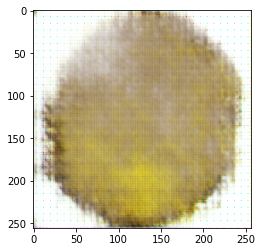

In [ ]:
from keras.models import load_model
%cd /content/drive/'My Drive'/Project_GAN/saved_models
model = load_model('generator_model.h5')
vector = np.asarray([[0.3125757 for _ in range(256)]])

x= model.predict(vector)
x = ((x+1)/2)
print(x.shape)
print("Generated Image")
pyplot.imshow(x[0])
pyplot.show